In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos del TP de Page Rank
En esta carpeta de Jupyer vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.
Para estos experimentos se toman multiples instancias en donde hay 20 o mas negocios:

1. **random**: Instancia aleatoria tanto en relaciones como en valores P.
2. **ralas**: Instancia en la cual hay pocas relaciones en la matriz.
3. **densas**: Instancia en la cual hay muchas relaciones entre las páginas.

4. **ralas-pbajo**: Instancia en la cual hay pocas relaciones en la matriz con un valor P bajo.
5. **densas-pbajo**: Instancia en la cual hay muchas relaciones entre las páginas con un valor P bajo.

6. **ralas-palto**: Instancia en la cual hay pocas relaciones en la matriz con un valor P bajo.
7. **densas-palto**: Instancia en la cual hay muchas relaciones entre las páginas con un valor P bajo.

## Sacamos los Outliers

In [1]:
# Eliminamos outliers por tiempo
def eliminar_outliers(df_modif_dataset):
    df_modif_dataset = df_modif_dataset[
        (np.percentile(df_modif_dataset["tiempo"], 5) <= df_modif_dataset["tiempo"]) & 
        (df_modif_dataset["tiempo"] <= (np.percentile(df_modif_dataset["tiempo"], 95)))]
    return df_modif_dataset

# Experimentos
Leemos el dataframe con todos los resultados y quitamos outliers

In [2]:
df_resultados = pd.read_csv("resultados/resultado.csv");
df_resultados_heatmap = pd.read_csv("resultados/resultado_heatmap.csv")

df_modificar = []
df_resultados_final = []
for dataset in df_resultados["dataset"].unique():
    for metodo in df_resultados["metodo"].unique():
        df_modificar = df_resultados[(df_resultados["dataset"] == dataset) & (df_resultados["metodo"] == metodo)]
        df_resultados_final.append(eliminar_outliers(df_modificar))
    
df_resultados = pd.concat(df_resultados_final)

NameError: name 'pd' is not defined

## Experimento 1: Complejidad de Fuerza Bruta
En este experimento evaluamos el método FB con los datasets. La hipótesis es que siempre va a tener un comportamiento exponencial porque tiene peor y mejor caso iguales.

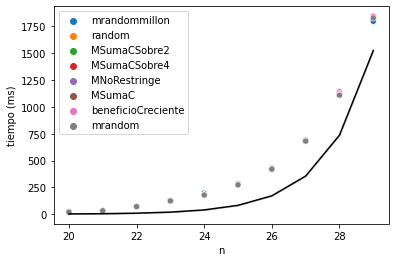

In [5]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
df_complejidad_FB = df_resultados[df_resultados["metodo"]=="FB"].copy();
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo', hue='dataset');

df_complejidad_FB["tiempo_esperado"] = (df_complejidad_FB["n"])*(2.0 ** df_complejidad_FB["n"] * 0.000000098);# Exponencial
fig = sns.lineplot(data=df_complejidad_FB, x='n', y='tiempo_esperado', color="black");

fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/fb-varios-casos.svg");

Índice de correlación de Pearson: 0.9820738523296285


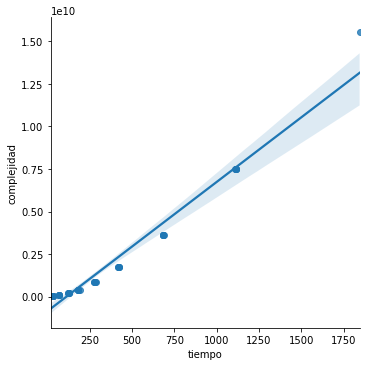

In [6]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="MSumaCSobre2")].copy();
df_complejidad_FB["complejidad"] = df_complejidad_FB["n"]*(2.0 ** df_complejidad_FB["n"]);
fig = sns.lmplot(data=df_complejidad_FB, x="tiempo", y="complejidad");
plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_FB, "tiempo", "complejidad"));

## Comparación Backtracking | Fuerza Bruta

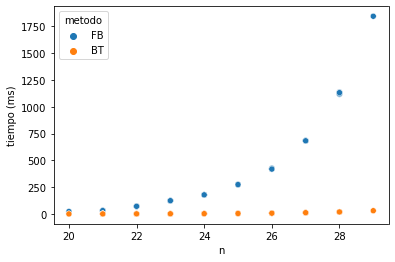

In [7]:
# Comparacion BT-O y DP
df_densidad_alta = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"] == "FB")) & (df_resultados["dataset"] == "MNoRestringe")].copy();
fig = sns.scatterplot(data=df_densidad_alta, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/comparacion-bt-dp-msinrestriccion.svg");

# Cuando M es muy grande
# Varia por el n. Cantidad de negocios
# Para n grandes BT-O puede tardar lo mismo que DP o puede tardar mas
# Igualmente no tarda 2^n (BT). Está mas cerca de una funcion polinomial que una funcion exponencial

## Comparación Programación Dinámica | Fuerza Bruta

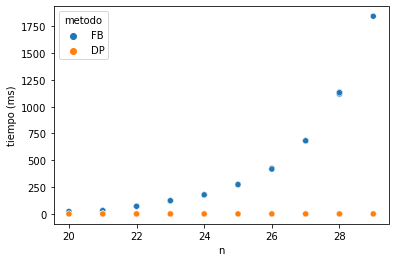

In [8]:
# Comparacion BT-O y DP
df_densidad_alta = df_resultados[((df_resultados["metodo"]=="DP") | (df_resultados["metodo"] == "FB")) & (df_resultados["dataset"] == "MNoRestringe")].copy();
fig = sns.scatterplot(data=df_densidad_alta, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/comparacion-bt-dp-msinrestriccion.svg");

# Cuando M es muy grande
# Varia por el n. Cantidad de negocios
# Para n grandes BT-O puede tardar lo mismo que DP o puede tardar mas
# Igualmente no tarda 2^n (BT). Está mas cerca de una funcion polinomial que una funcion exponencial

## Experimento 2: Complejidad de Backtracking
En este experimento evaluamos el método BT con los nsobre2. La hipótesis es que va a tener un comportamiento exponencial en el peor caso y lineal en el mejor caso.

### Evaluamos varios casos de prueba

array(['mrandommillon', 'random', 'MSumaCSobre2', 'MSumaCSobre4',
       'MNoRestringe', 'MSumaC', 'beneficioCreciente', 'mrandom'],
      dtype=object)

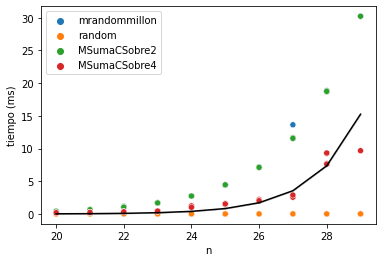

In [9]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="BT")&((df_resultados["dataset"]=="MSumaCSobre2")|(df_resultados["dataset"]=="MSumaCSobre4")|(df_resultados["dataset"]=="random")|(df_resultados["dataset"]=="mrandommillon"))].copy();
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo', hue='dataset');

df_complejidad_FB["tiempo_esperado"] = (df_complejidad_FB["n"])*(2.0 ** df_complejidad_FB["n"] * 0.00000000098);# Exponencial
fig = sns.lineplot(data=df_complejidad_FB, x='n', y='tiempo_esperado', color="black");

fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-sobre2-sobre4-millon-random.svg");
df_resultados["dataset"].unique()

array(['mrandommillon', 'random', 'MSumaCSobre2', 'MSumaCSobre4',
       'MNoRestringe', 'MSumaC', 'beneficioCreciente', 'mrandom'],
      dtype=object)

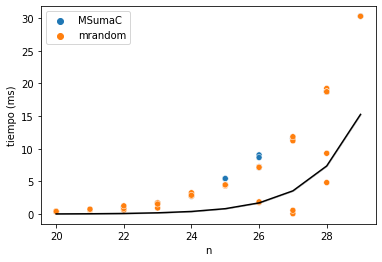

In [10]:
# sumac y mrandom
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="BT")&((df_resultados["dataset"]=="MSumaC")|(df_resultados["dataset"]=="mrandom"))].copy();
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo', hue='dataset');

df_complejidad_FB["tiempo_esperado"] = (df_complejidad_FB["n"])*(2.0 ** df_complejidad_FB["n"] * 0.00000000098);# Exponencial
fig = sns.lineplot(data=df_complejidad_FB, x='n', y='tiempo_esperado', color="black");

fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-msumaC-mrandom.svg");
df_resultados["dataset"].unique()

### Correlacion con MSumaCSobre4 - n y 2^n

Índice de correlación de Pearson: 0.9410455142325059


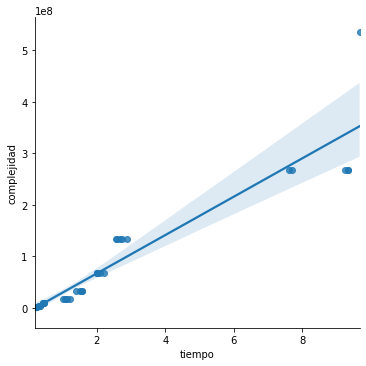

In [11]:
# Caso O(2^n)
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "MSumaCSobre4")].copy();
df_BT_peor_caso["complejidad"] = 2**df_BT_peor_caso["n"];
fig = sns.lmplot(data=df_BT_peor_caso, x="tiempo", y="complejidad");
plt.savefig("graficos/bt-correlacion-MSumaCSobre2-2alan.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_peor_caso, "tiempo", "complejidad"));

Índice de correlación de Pearson: 0.8008659387536388


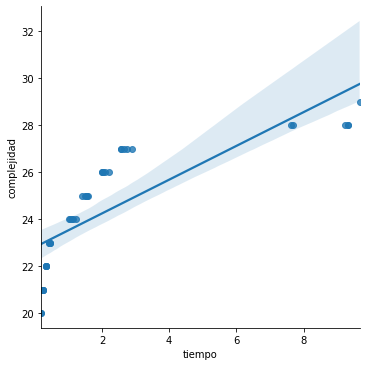

In [12]:
# Caso O(n)
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "MSumaCSobre4")].copy();
df_BT_peor_caso["complejidad"] = df_BT_peor_caso["n"];
fig = sns.lmplot(data=df_BT_peor_caso, x="tiempo", y="complejidad");
plt.savefig("graficos/bt-correlacion-MSumaCSobre4-n.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_peor_caso, "tiempo", "complejidad"));

### Correlacion con MSumaCSobre2 - n y 2^n

Índice de correlación de Pearson: 0.9846780476359608


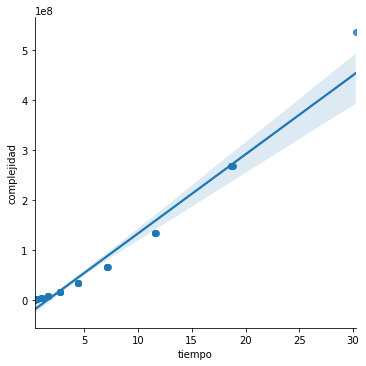

In [13]:
# Caso O(2^n)
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "MSumaCSobre2")].copy();
df_BT_peor_caso["complejidad"] = (2**df_BT_peor_caso["n"]);
fig = sns.lmplot(data=df_BT_peor_caso, x="tiempo", y="complejidad");
plt.savefig("graficos/bt-correlacion-MSumaCSobre2-2alan.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_peor_caso, "tiempo", "complejidad"));

Índice de correlación de Pearson: 0.8803512611516685


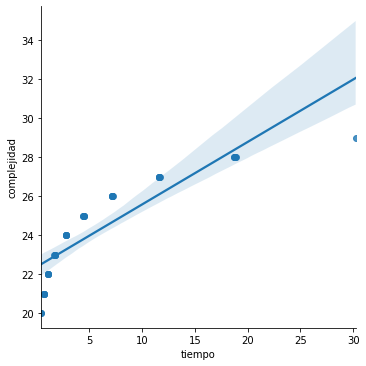

In [14]:
# Caso O(n)
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "MSumaCSobre2")].copy();
df_BT_peor_caso["complejidad"] = (df_BT_peor_caso["n"]);
fig = sns.lmplot(data=df_BT_peor_caso, x="tiempo", y="complejidad");
plt.savefig("graficos/bt-correlacion-MSumaCSobre2-n.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_peor_caso, "tiempo", "complejidad"));

### Correlacion a N e instancia random

Índice de correlación de Pearson: 0.33707545116448984


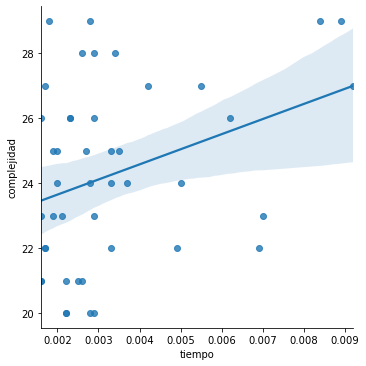

In [43]:
# Caso O(n)
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "random")].copy();
df_BT_peor_caso["complejidad"] = (df_BT_peor_caso["n"]);
fig = sns.lmplot(data=df_BT_peor_caso, x="tiempo", y="complejidad");
plt.savefig("graficos/bt-correlacion-MSumaCSobre2-n.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_peor_caso, "tiempo", "complejidad"));

### Evaluamos todos los casos de prueba BT-O (Con podas)

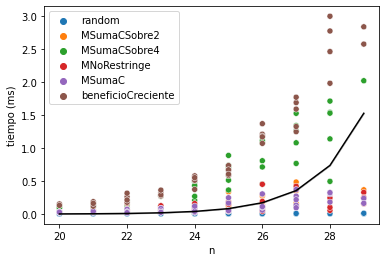

In [15]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="BT-O")&((df_resultados["dataset"]!="mrandom"))&((df_resultados["dataset"]!="mrandommillon"))].copy();
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo', hue='dataset');

df_complejidad_FB["tiempo_esperado"] = (df_complejidad_FB["n"])*(2.0 ** df_complejidad_FB["n"] * 0.000000000098);# Exponencial
fig = sns.lineplot(data=df_complejidad_FB, x='n', y='tiempo_esperado', color="black");

fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-o-varios-casos.svg");

# Conviene ponerlo en el informe?
# Con podas hay muy poco tiempo en complejidad
# Si el M es muy grande agrega todo
# En ganancia_final mucho ganancia en final y poca en principio

# Si no agregas ningun local ganancia es 0
# Siempre se puede mejorar la ganancia 0
# Entonces seguis y no podas. Eso ocurre con un M muy chico
# El M es la suma porque solo queremos analizar la poda por optimalidad

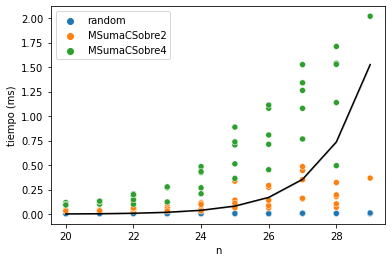

In [16]:
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="BT-O")&((df_resultados["dataset"]=="random")|(df_resultados["dataset"]=="MSumaCSobre2")|(df_resultados["dataset"]=="MSumaCSobre4"))].copy();
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo', hue='dataset');

df_complejidad_FB["tiempo_esperado"] = (df_complejidad_FB["n"])*(2.0 ** df_complejidad_FB["n"] * 0.000000000098);# Exponencial
fig = sns.lineplot(data=df_complejidad_FB, x='n', y='tiempo_esperado', color="black");

fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-o-suma2-suma4-random.svg");

## Comparacion de BT-O con beneficio creciente y mRandom

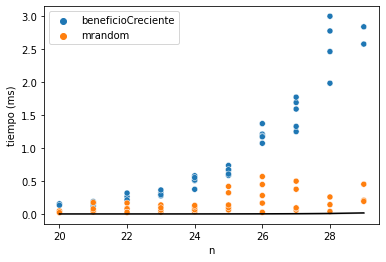

In [17]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="BT-O") & ((df_resultados["dataset"] == "mrandom") | (df_resultados["dataset"] == "beneficioCreciente"))].copy();
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo', hue='dataset');

df_complejidad_FB["tiempo_esperado"] = (df_complejidad_FB["n"])*(2.0 ** df_complejidad_FB["n"] * 0.00000000000098);# Exponencial
fig = sns.lineplot(data=df_complejidad_FB, x='n', y='tiempo_esperado', color="black");

fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-o-beneficioCreciente-mrandom.svg");

# Conviene ponerlo en el informe?
# Con podas hay muy poco tiempo en complejidad
# Si el M es muy grande agrega todo
# En ganancia_final mucho ganancia en final y poca en principio

# Si no agregas ningun local ganancia es 0
# Siempre se puede mejorar la ganancia 0
# Entonces seguis y no podas. Eso ocurre con un M muy chico
# El M es la suma porque solo queremos analizar la poda por optimalidad

## Experimento 3: Análisis de las podas
Analizar Backtracking con y sin las podas para distintas densidades.

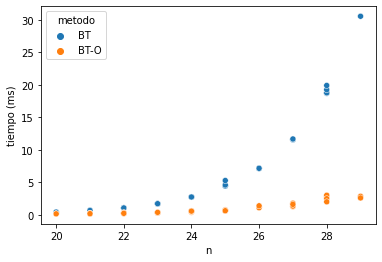

In [18]:
# Hacemos una comparacion de los graficos BT con poda de factibilidad y BT con poda de factibilidad Y poda por optimalidad
df_BT_ganancia_final = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "beneficioCreciente")].copy();
fig = sns.scatterplot(data=df_BT_ganancia_final, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-comparacion-podas-beneficioCreciente.svg");

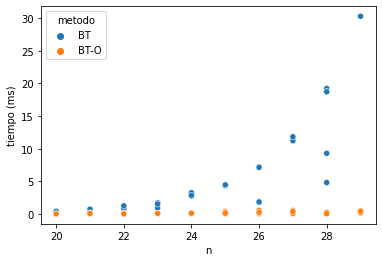

In [19]:
# Hacemos una comparacion de los graficos BT con poda de factibilidad y BT con poda de factibilidad Y poda por optimalidad
df_BT_ganancia_final = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "mrandom")].copy();
fig = sns.scatterplot(data=df_BT_ganancia_final, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-comparacion-podas-mrandom.svg");

## Instancias con distribución de contagios uniforme y creciente

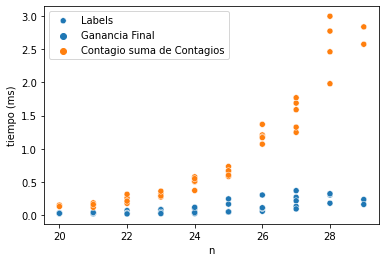

In [20]:
df_BT_O = df_resultados[(df_resultados["metodo"]=="BT-O") & ((df_resultados["dataset"] == "MSumaC") | (df_resultados["dataset"] == "beneficioCreciente"))].copy();
fig = sns.scatterplot(data=df_BT_O, x='n', y='tiempo', hue='dataset');
fig.legend(labels=['Labels', 'Ganancia Final','Contagio suma de Contagios']);

fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-o-msumac-beneficioCreciente.svg");

# Como un grupo de instancias tiene mayor concentración de ganancias al final tarda mas en podar
# entonces se hacen mas llamados recursivos
# es mas probable que se pode una vez se alcance el sector del vector de mayor ganancias

# Experimento 4: Complejidad de programación dinámica
En este experimento analizamos el tiempo de ejecución real del algoritmo de programación dinámica y lo comparamos con su cota teórica para ver si en la práctica se comporta de manera similar.

# Caso mNoRestringe y mRandom

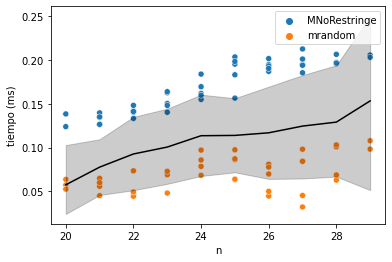

In [21]:
# Comparamos dos dataset. MNoRestringe y todosaleatorios
# Para todos los sets de entrada es 2^n entonces la complejidad final es 2^n
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="DP") & ((df_resultados["dataset"] == "MNoRestringe") | (df_resultados["dataset"] == "mrandom"))].copy();
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo', hue='dataset');

df_complejidad_FB["tiempo_esperado"] = (df_complejidad_FB["n"])*(df_complejidad_FB["M"])*0.000004;# Exponencial
fig = sns.lineplot(data=df_complejidad_FB, x='n', y='tiempo_esperado', color="black");

fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/fb-verificacion-complejidad.svg");

### Comparamos todos los casos de prueba

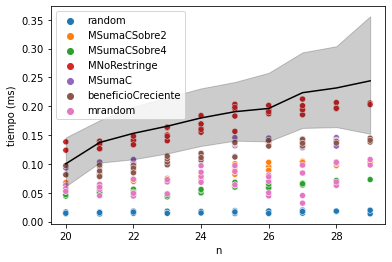

In [22]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"] != "mrandommillon")].copy();

fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo', hue='dataset');

df_complejidad_FB["tiempo_esperado"] = (df_complejidad_FB["n"])*(df_complejidad_FB["M"])*0.000011;# nxM
fig = sns.lineplot(data=df_complejidad_FB, x='n', y='tiempo_esperado', color="black");

fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-todos-casos.svg");

# Aca impacta que aumentes el M por mas que no hayan mas locales para agregar

# Creemos que MNoRestringe excede porque la inicialización de la matriz es nxM. Vale la pena medirlo?
# Preguntar si el tiempo de generar la matriz debe influir en el resultado o no
# "Incluir una referencia cuanto tarda creando la matriz y sin crear la matriz"

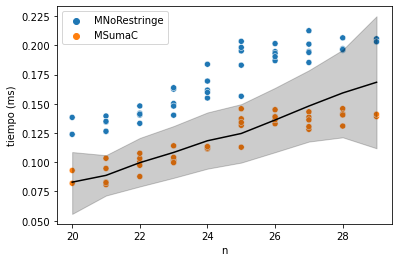

In [23]:
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="DP") & ((df_resultados["dataset"] == "MNoRestringe") | (df_resultados["dataset"] == "MSumaC"))].copy();

fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo', hue='dataset');

df_complejidad_FB["tiempo_esperado"] = (df_complejidad_FB["n"])*(df_complejidad_FB["M"])*0.0000036;# nxM
fig = sns.lineplot(data=df_complejidad_FB, x='n', y='tiempo_esperado', color="black");

fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-mnorestringe-msumac.svg");

Índice de correlación de Pearson: 0.9409797059472067


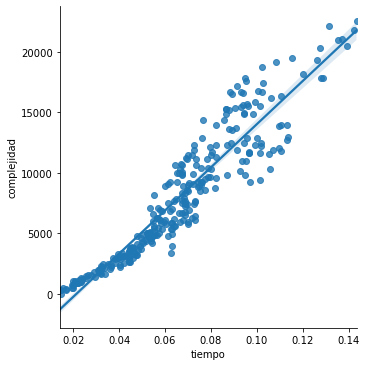

In [24]:
df_corr = df_resultados_heatmap[(df_resultados_heatmap["metodo"]=="DP") & (df_resultados_heatmap["dataset"] == "mrandom")].copy();
df_corr["complejidad"] = (df_corr["M"]*df_corr["n"]);
fig = sns.lmplot(data=df_corr, x="tiempo", y="complejidad");
plt.savefig("graficos/pd-correlacion-mrandom.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_corr, "tiempo", "complejidad"));

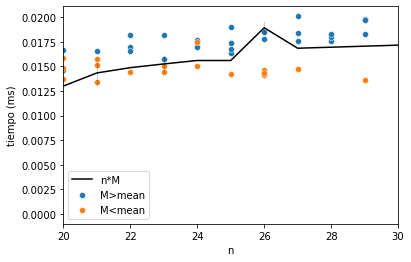

In [25]:
# Graficamos la evolución del tiempo de ejecución en función de n, con cortes en distintos W.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="random")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["M"]>np.mean(df_dinamica["M"])], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["M"]<np.mean(df_dinamica["M"])], x='n', y='tiempo');

df_dinamica["tiempo_esperado"] = (df_dinamica["n"])*(df_dinamica["M"])*0.000026;# nxM
fig = sns.lineplot(data=df_dinamica, x='M', y='tiempo_esperado', color="black");
fig.set(xlim=(20, 30))

fig.legend(labels=['n*M', 'M>mean','M<mean']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-n-random.svg");

# El Azul refiere a un M mayor. Entonces pueden entrar mas locales
# Puede hacer mas recursion, puede consumir mas tiempo

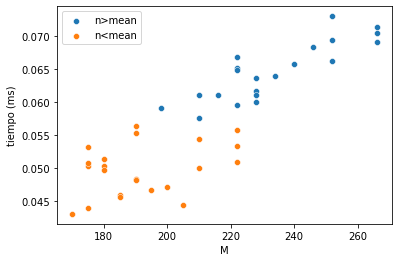

In [26]:
# Graficamos la evolución del tiempo de ejecución en función de W, con cortes en distintos n.
# Caso nsobre2
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="MSumaCSobre4")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]>np.mean(df_dinamica["n"])], x='M', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]<np.mean(df_dinamica["n"])], x='M', y='tiempo');
fig.legend(labels=['n>mean','n<mean']);
fig.set(xlabel='M', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-M-msumacsobre4.svg");

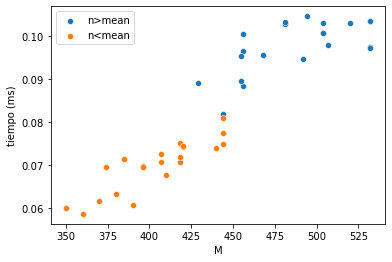

In [27]:
# Graficamos la evolución del tiempo de ejecución en función de W, con cortes en distintos n.
# Caso nsobre2
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="MSumaCSobre2")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]>np.mean(df_dinamica["n"])], x='M', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]<np.mean(df_dinamica["n"])], x='M', y='tiempo');
fig.legend(labels=['n>mean','n<mean']);
fig.set(xlabel='M', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-M-msumacsobre2.svg");

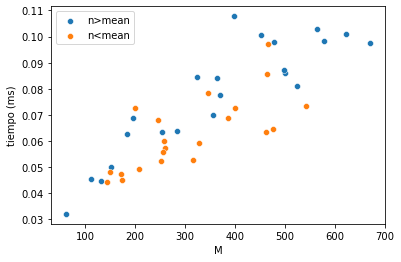

In [28]:
# Graficamos la evolución del tiempo de ejecución en función de W, con cortes en distintos n.
# Caso Random
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="mrandom")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]>np.mean(df_dinamica["n"])], x='M', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]<np.mean(df_dinamica["n"])], x='M', y='tiempo');
fig.legend(labels=['n>mean','n<mean']);
fig.set(xlabel='M', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-M-random.svg");

# Si bien es O(nxM) porque podemos acotar la cantidad de llamados recursivos
# no crece en relacion de M

# El algoritmo hace menos llamadas recursivas cuando el M es mas chico
# La variacion en M no es significativa porque no permite agregar mas locales

# Heatmap de DP con Random y M>20 | Gráfico de correlación

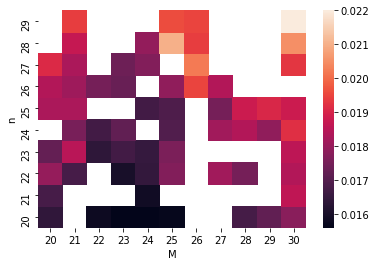

In [29]:
# Graficamos el tiempo de ejecución de las distintas instancias ordenadas por n y W.
df_dinamica = df_resultados_heatmap[(df_resultados_heatmap["metodo"]=="DP") & (df_resultados_heatmap["dataset"]=="random") & (df_resultados_heatmap["M"] > 19)].copy();
df_heatmap = df_dinamica.pivot_table(index='n', columns='M', values='tiempo');

fig = sns.heatmap(df_heatmap);
fig.invert_yaxis();
plt.savefig("graficos/dp-heatmap-random.svg");

# Si n y M son grandes tarda mucho
# Si M es grande, depende de n
# El valor de M es muy bajo en este grafico, no hay peso significativo, aun siendo O(nxM)

Índice de correlación de Pearson: 0.9030184843634764


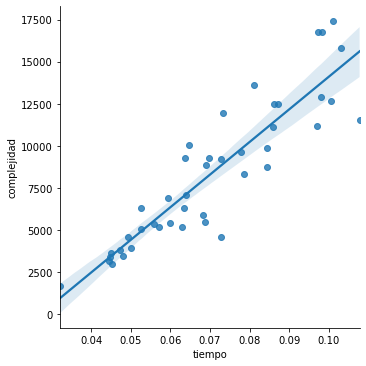

In [39]:
df_corr = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"] == "mrandom")].copy();
df_corr["complejidad"] = (df_corr["M"]*df_corr["n"]);
fig = sns.lmplot(data=df_corr, x="tiempo", y="complejidad");
plt.savefig("graficos/pd-correlacion-random.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_corr, "tiempo", "complejidad"));

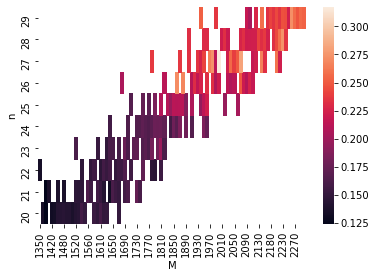

In [31]:
# Graficamos el tiempo de ejecución de las distintas instancias ordenadas por n y W.
df_dinamica = df_resultados_heatmap[(df_resultados_heatmap["metodo"]=="DP") & (df_resultados_heatmap["dataset"]=="MNoRestringe")].copy();
df_heatmap = df_dinamica.pivot_table(index='n', columns='M', values='tiempo', aggfunc=np.mean);
fig = sns.heatmap(df_heatmap);
fig.invert_yaxis();
plt.savefig("graficos/dp-heatmap-mnorestringe.svg");

# Si n y M son grandes tarda mucho
# Si M es grande, depende de n
# El valor de M es muy bajo en este grafico, no hay peso significativo, aun siendo O(nxM)

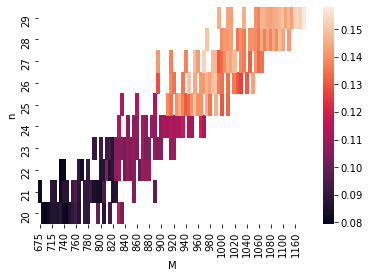

In [32]:
# Graficamos el tiempo de ejecución de las distintas instancias ordenadas por n y W.
df_dinamica = df_resultados_heatmap[(df_resultados_heatmap["metodo"]=="DP") & (df_resultados_heatmap["dataset"]=="MSumaC")].copy();
df_heatmap = df_dinamica.pivot_table(index='n', columns='M', values='tiempo', aggfunc=np.mean);
fig = sns.heatmap(df_heatmap);
fig.invert_yaxis();
plt.savefig("graficos/dp-heatmap-msumac.svg");

# Si n y M son grandes tarda mucho
# Si M es grande, depende de n
# El valor de M es muy bajo en este grafico, no hay peso significativo, aun siendo O(nxM)

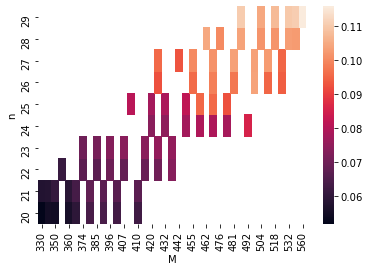

In [33]:
# Graficamos el tiempo de ejecución de las distintas instancias ordenadas por n y W.
# nsobre2
df_dinamica = df_resultados_heatmap[(df_resultados_heatmap["metodo"]=="DP") & (df_resultados_heatmap["dataset"]=="MSumaCSobre2")].copy();
df_heatmap = df_dinamica.pivot_table(index='n', columns='M', values='tiempo', aggfunc=np.mean);
fig = sns.heatmap(df_heatmap);
fig.invert_yaxis();
plt.savefig("graficos/dp-heatmap-msumacsobre2.svg");

Índice de correlación de Pearson: 0.9073696902167687


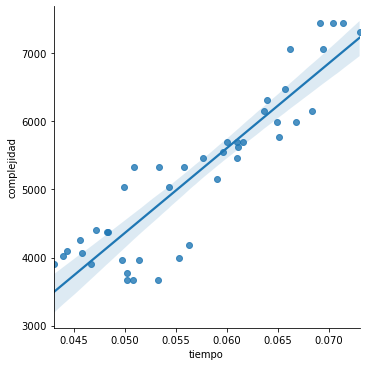

In [37]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="MSumaCSobre4")].copy();
df_dinamica["complejidad"] = df_dinamica["n"] * df_dinamica["M"];
#fig = sns.scatterplot(data=df_dinamica, x="tiempo", y="complejidad");
fig = sns.lmplot(data=df_dinamica, x="tiempo", y="complejidad");
plt.savefig("graficos/dp-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_dinamica, "tiempo", "complejidad"));

# Los puntos con n bajo varian en complejidad
# Si el n es alto, el tiempo se incrementa
# Puede pasar que haya un M algo y un n bajo y eso tarde poco
# Sin embargo la complejidad empirica es mucha

# Podemos decir que la baja incidencia del M en el tiempo hace que la complejidad no sea lo esperado

# Mas chico el M mas cercano a 1 -> Mas se parece a la funcion que queres aproximar O(nxM)

## Experimento 5: Comparación Backtacking y Programación Dinámica
En este experimento se trata de buscar para qué casos funciona mejor cada técnica. Vamos a comparar DP con BT y BT-O

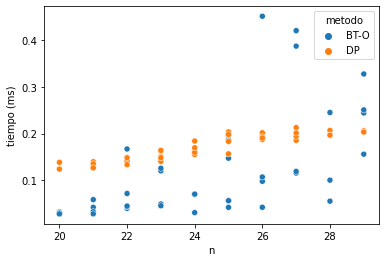

In [35]:
# Comparacion BT-O y DP
df_densidad_alta = df_resultados[((df_resultados["metodo"]=="DP") | (df_resultados["metodo"] == "BT-O")) & (df_resultados["dataset"] == "MNoRestringe")].copy();
fig = sns.scatterplot(data=df_densidad_alta, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/comparacion-bt-o-dp-msinrestriccion.svg");

# Cuando M es muy grande
# Varia por el n. Cantidad de negocios
# Para n grandes BT-O puede tardar lo mismo que DP o puede tardar mas
# Igualmente no tarda 2^n (BT). Está mas cerca de una funcion polinomial que una funcion exponencial

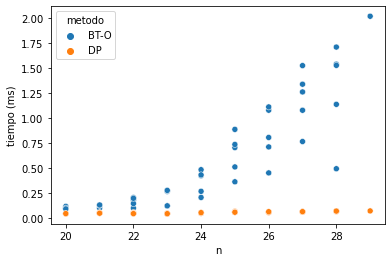

In [42]:
# Comparacion BT-O y DP
df_densidad_alta = df_resultados[((df_resultados["metodo"]=="DP") | (df_resultados["metodo"] == "BT-O")) & (df_resultados["dataset"] == "MSumaCSobre4")].copy();
fig = sns.scatterplot(data=df_densidad_alta, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/comparacion-bt-o-dp-msumacsobre4.svg");

# Cuando M es muy grande
# Varia por el n. Cantidad de negocios
# Para n grandes BT-O puede tardar lo mismo que DP o puede tardar mas
# Igualmente no tarda 2^n (BT). Está mas cerca de una funcion polinomial que una funcion exponencial

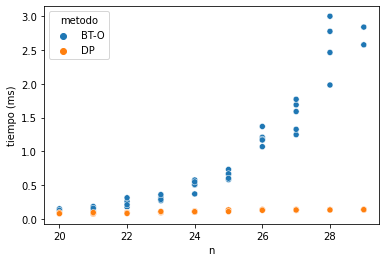

In [41]:
# Comparacion BT-O y DP
df_densidad_alta = df_resultados[((df_resultados["metodo"]=="DP") | (df_resultados["metodo"] == "BT-O")) & (df_resultados["dataset"] == "beneficioCreciente")].copy();
fig = sns.scatterplot(data=df_densidad_alta, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/comparacion-bt-o-dp-beneficioCreciente.svg");

# Cuando M es muy grande
# Varia por el n. Cantidad de negocios
# Para n grandes BT-O puede tardar lo mismo que DP o puede tardar mas
# Igualmente no tarda 2^n (BT). Está mas cerca de una funcion polinomial que una funcion exponencial